In [10]:
import numpy as np
def sin(x,T = 100):
    return np.sin(2.0*np.pi*x/T)
def toy_problem(T=100,ampl = 0.05):
    x = np.arange(0,2*T+1)
    noise =  ampl * np.random.uniform(low =-1.0, high = 1.0, size = len(x))
    return sin(x)+noise

T = 100
f = toy_problem(T).astype(np.float32)
length_of_sequences = len(f)

In [11]:
maxlen = 25
x = []
t = []
for i in range(length_of_sequences-maxlen):
    x.append(f[i:i+maxlen])
    t.append(f[i+maxlen])
    
x = np.array(x).reshape(-1,maxlen,1)
t = np.array(t).reshape(-1,1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_val,t_train,t_val = train_test_split(x,t,test_size = 0.2, shuffle = False)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping


# モデル構築

In [14]:
model = Sequential()
model.add(SimpleRNN(50,activation='tanh',
                    kernel_initializer='glorot_normal', #入力層、隠れ層間の重みの初期値　tanhの場合はXavierの初期化
                    recurrent_initializer='orthogonal' # 過去の隠れ層からの重みの初期値　直行座標
                   ))
model.add(Dense(1,activation='linear'))

# モデル学習

In [15]:
optimizer = optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,amsgrad=True)
model.compile(optimizer = optimizer,loss = 'mean_squared_error')
es = EarlyStopping(monitor='val_loss',patience=10, verbose=1)
hist = model.fit(x_train, t_train,epochs = 1000,batch_size = 100,verbose =2, validation_data = (x_val,t_val),callbacks = [es])

Train on 140 samples, validate on 36 samples
Epoch 1/1000
140/140 - 4s - loss: 0.9622 - val_loss: 0.4381
Epoch 2/1000
140/140 - 0s - loss: 0.5030 - val_loss: 0.2008
Epoch 3/1000
140/140 - 0s - loss: 0.2356 - val_loss: 0.1002
Epoch 4/1000
140/140 - 0s - loss: 0.0976 - val_loss: 0.0537
Epoch 5/1000
140/140 - 0s - loss: 0.0431 - val_loss: 0.0309
Epoch 6/1000
140/140 - 0s - loss: 0.0323 - val_loss: 0.0193
Epoch 7/1000
140/140 - 0s - loss: 0.0347 - val_loss: 0.0133
Epoch 8/1000
140/140 - 0s - loss: 0.0366 - val_loss: 0.0103
Epoch 9/1000
140/140 - 0s - loss: 0.0310 - val_loss: 0.0103
Epoch 10/1000
140/140 - 0s - loss: 0.0206 - val_loss: 0.0122
Epoch 11/1000
140/140 - 0s - loss: 0.0130 - val_loss: 0.0145
Epoch 12/1000
140/140 - 0s - loss: 0.0100 - val_loss: 0.0152
Epoch 13/1000
140/140 - 0s - loss: 0.0115 - val_loss: 0.0146
Epoch 14/1000
140/140 - 0s - loss: 0.0133 - val_loss: 0.0127
Epoch 15/1000
140/140 - 0s - loss: 0.0128 - val_loss: 0.0103
Epoch 16/1000
140/140 - 0s - loss: 0.0101 - val_l

140/140 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 135/1000
140/140 - 0s - loss: 0.0017 - val_loss: 0.0017
Epoch 136/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 137/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 138/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016
Epoch 139/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 140/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 141/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016
Epoch 142/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016
Epoch 143/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 144/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 145/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016
Epoch 146/1000
140/140 - 0s - loss: 0.0015 - val_loss: 0.0016
Epoch 147/1000
140/140 - 0s - loss: 0.0016 - val_loss: 0.0016
Epoch 148/1000
140/140 - 0s - loss: 0.0015 - val_loss: 0.0016
Epoch 149/1000
140/140 - 0s - loss: 0.0015 - val_loss: 0.0016
Epoch 150/1000
140/140 

# モデル評価

In [ ]:
#sin = toy_problem(T, ampl = 0)
gen = [None for i in range(maxlen)]
z = x[:1]

for i in range(length_of_sequences - maxlen):
    preds = model.predict(z[-1:])
    z = np.append(z, preds)[1:]
    z = z.reshape(-1,maxlen,1)
    gen.append(preds[0,0])
    


In [ ]:
x[:1]

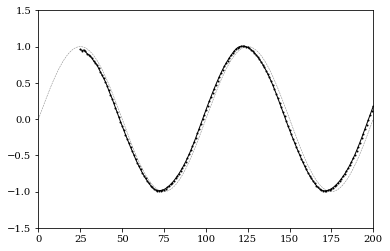

In [33]:
fig = plt.figure()
plt.rc('font',family = 'serif')
plt.xlim([0,2*T])
plt.ylim([-1.5,1.5])
plt.plot(range(len(f)),sin,color = 'gray',linestyle = '--',linewidth = 0.5)

plt.plot(range(len(f)),gen, color = 'black',linewidth = 1,marker = 'o', markersize = 1, markerfacecolor = 'black', markeredgecolor = 'black')

# tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from callbacks import EarlyStopping

# モデル実装

In [6]:
class RNN(Model):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = SimpleRNN(hidden_dim, activation='tanh',
                            kernel_initializer='glorot_normal',
                            recurrent_initializer='orthogonal')
        self.l2 = Dense(1, activation='linear')

    def call(self, x):
        h = self.l1(x)
        y = self.l2(h)

        return y

# モデルの構築

In [7]:
model = RNN(50)

# モデル学種

In [22]:
criterion = losses.MeanSquaredError()
optimizer = optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,amsgrad=True)

train_loss = metrics.Mean()
val_loss = metrics.Mean()

def compute_loss(t,y):
    return criterion(t,y)
def train_step(x,t):
    with tf.GradientTape() as tape:
        preds = model(x)
        loss = compute_loss(t,preds)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    train_loss(loss)
    return loss

def val_step(x,t):
    preds = model(x)
    loss = compute_loss(t, preds)
    val_loss(loss)
    
epochs = 1000
batch_size = 100

n_batches_train = x_train.shape[0]//batch_size+1
n_batches_val = x_val.shape[0]//batch_size +1
hist = {'loss':[],'val_loss':[]}
es = EarlyStopping(patience=10, verbose=1)

for epoch in range(epochs):
    x_, t_ = shuffle(x_train, t_train)
    
    for batch in range(n_batches_train):
        start = batch*batch_size
        end = start +batch_size
        train_step(x_[start:end],t_[start:end])
        
    for batch in range(n_batches_val):
        start = batch*batch_size
        end = start +batch_size
        val_step(x_[start:end],t_[start:end])
        
    hist['loss'].append(train_loss.result())
    hist['val_loss'].append(val_loss.result())
    
    print('epoch: {}, loss: {:.3}, val_loss: {:.3f}'.format(
            epoch+1,
            train_loss.result(),
            val_loss.result()
        ))
    
    if es(val_loss.result()):
        break

epoch: 1, loss: 0.378, val_loss: 0.212
epoch: 2, loss: 0.276, val_loss: 0.149
epoch: 3, loss: 0.207, val_loss: 0.109
epoch: 4, loss: 0.162, val_loss: 0.091
epoch: 5, loss: 0.136, val_loss: 0.083
epoch: 6, loss: 0.122, val_loss: 0.076
epoch: 7, loss: 0.109, val_loss: 0.067
epoch: 8, loss: 0.0967, val_loss: 0.060
epoch: 9, loss: 0.0875, val_loss: 0.055
epoch: 10, loss: 0.0803, val_loss: 0.052
epoch: 11, loss: 0.0746, val_loss: 0.048
epoch: 12, loss: 0.0691, val_loss: 0.044
epoch: 13, loss: 0.0644, val_loss: 0.041
epoch: 14, loss: 0.0604, val_loss: 0.039
epoch: 15, loss: 0.0569, val_loss: 0.037
epoch: 16, loss: 0.0537, val_loss: 0.035
epoch: 17, loss: 0.0507, val_loss: 0.033
epoch: 18, loss: 0.0481, val_loss: 0.031
epoch: 19, loss: 0.0458, val_loss: 0.030
epoch: 20, loss: 0.0437, val_loss: 0.029
epoch: 21, loss: 0.0417, val_loss: 0.027
epoch: 22, loss: 0.0399, val_loss: 0.026
epoch: 23, loss: 0.0383, val_loss: 0.025
epoch: 24, loss: 0.0368, val_loss: 0.024
epoch: 25, loss: 0.0354, val_los

epoch: 197, loss: 0.00538, val_loss: 0.004
epoch: 198, loss: 0.00536, val_loss: 0.004
epoch: 199, loss: 0.00533, val_loss: 0.004
epoch: 200, loss: 0.00531, val_loss: 0.004
epoch: 201, loss: 0.00529, val_loss: 0.004
epoch: 202, loss: 0.00527, val_loss: 0.004
epoch: 203, loss: 0.00525, val_loss: 0.004
epoch: 204, loss: 0.00522, val_loss: 0.004
epoch: 205, loss: 0.0052, val_loss: 0.004
epoch: 206, loss: 0.00518, val_loss: 0.004
epoch: 207, loss: 0.00516, val_loss: 0.004
epoch: 208, loss: 0.00514, val_loss: 0.004
epoch: 209, loss: 0.00512, val_loss: 0.004
epoch: 210, loss: 0.0051, val_loss: 0.004
epoch: 211, loss: 0.00508, val_loss: 0.004
epoch: 212, loss: 0.00506, val_loss: 0.004
epoch: 213, loss: 0.00504, val_loss: 0.004
epoch: 214, loss: 0.00502, val_loss: 0.004
epoch: 215, loss: 0.005, val_loss: 0.004
epoch: 216, loss: 0.00498, val_loss: 0.004
epoch: 217, loss: 0.00496, val_loss: 0.004


KeyboardInterrupt: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import torch
import torch.nn as nn
import torch.optim as optimizers
from callbacks import EarlyStopping

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# モデル実装

In [2]:
class RNN(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = nn.RNN(1, hidden_dim,
                         nonlinearity='tanh',
                         batch_first=True)
        self.l2 = nn.Linear(hidden_dim, 1)

        nn.init.xavier_normal_(self.l1.weight_ih_l0)
        nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y


# モデル構築

In [3]:
model = RNN(50).to(device)

# モデル学習

In [31]:
criterion = nn.MSELoss(reduction = 'mean')
optimizer = optimizers.Adam(model.parameters(), lr=0.01,betas=(0.9,0.009),amsgrad=True)


def compute_loss(t,y):
    return criterion(y,t)

def train_step(x,t):
    x = torch.Tensor(x).to(device)

AttributeError: 'RNN' object has no attribute 'parameters'

# LSTM

# Keras

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

/Users/tabata/opt/anaconda3/envs/deeplearning/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/tabata/opt/anaconda3/envs/deeplearning/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/tabata/opt/anaconda3/envs/deeplearning/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## モデル構築

In [3]:
model = Sequential()
model.add(LSTM(50, activation = 'tanh',
              recurrent_activation='sigmoid',#各ゲートにおける活性化関数
              kernel_initializer='glorot_normal',
              recurrent_initializer='orthogonal'),
         )
model.add(Dense(1, activation='linear'))

# tensorflow

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from callbacks import EarlyStopping

In [5]:
class RNN(Model):
    def __init__(self,hidden_dim):
        super().__init__()
        self.l1 = LSTM(hidden_dim,activation = 'tanh',
                      recurrent_activation= 'sigmoid',
                      kernel_initializer='glorot_normal',
                      recurrent_initializer='orthogonal')
        self.l2 = Dense(1, activationn = 'linear')
        
    def call(self, x):
        h = self.l1(x)
        y = self.l2(h)
        return y

# pytorch

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import torch
import torch.nn as nn
import torch.optim as optimizers
from callbacks import EarlyStopping

In [8]:
class RNN(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = nn.LSTM(1, hidden_dim, batch_first = True)
        self.l2 = nn.Linear(hidden_dim, 1)
        
        nn.init.xavier_normal_(self.l1.weight_ih_l0)
        nn.init.orthogonal_(self.l1.weight_hh_l0)
        
    def forward(self, x):
        h,_ = self.l1(x)
        y = self.l2(h[:,-1])
        return y